In [12]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns


In [13]:
df=pd.read_csv("global_ai_tools_students_use.csv")

In [14]:
df.head()

,student_id,age,gender,country,grade,uses_ai_for_study,uses_chatgpt,uses_gemini,uses_grammarly,uses_quillbot,...,uses_edu_chat,uses_other,usefulness_chatgpt,usefulness_gemini,usefulness_grammarly,usefulness_quillbot,usefulness_notion_ai,usefulness_phind,usefulness_edu_chat,usefulness_other
0,S0001,17,Female,India,12th,True,False,False,False,False,...,False,True,NaN,NaN,NaN,NaN,6.0,NaN,NaN,6.0
1,S0002,18,Female,Canada,10th,True,False,True,False,True,...,False,False,NaN,9.0,NaN,10.0,NaN,NaN,NaN,NaN
2,S0003,16,Male,UK,12th,False,False,False,False,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S0004,18,Female,UK,10th,False,False,False,False,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S0005,18,Male,USA,11th,True,False,False,True,False,...,True,False,NaN,NaN,10.0,NaN,NaN,NaN,8.0,NaN


In [15]:
df.describe()

,age,usefulness_chatgpt,usefulness_gemini,usefulness_grammarly,usefulness_quillbot,usefulness_notion_ai,usefulness_phind,usefulness_edu_chat,usefulness_other
count,500.000000,115.00000,123.000000,122.000000,122.000000,114.000000,127.000000,105.000000,100.000000
mean,15.970000,8.13913,7.983740,8.008197,8.073770,8.201754,7.858268,8.114286,7.960000
std,1.425891,1.31714,1.408311,1.507534,1.379712,1.396455,1.429421,1.482684,1.427861
min,14.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
25%,15.000000,7.00000,7.000000,6.250000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,16.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,17.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,18.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Age

In [16]:
ai_tool_columns = [
    'uses_chatgpt', 'uses_gemini', 'uses_grammarly',
    'uses_quillbot', 'uses_notion_ai', 'uses_phind',
    'uses_edu_chat', 'uses_other'
]

In [17]:
df_age_filtered = df[df['age'].between(14, 18)]


In [18]:
age_tool_usage = df_age_filtered.groupby('age')[ai_tool_columns].sum()


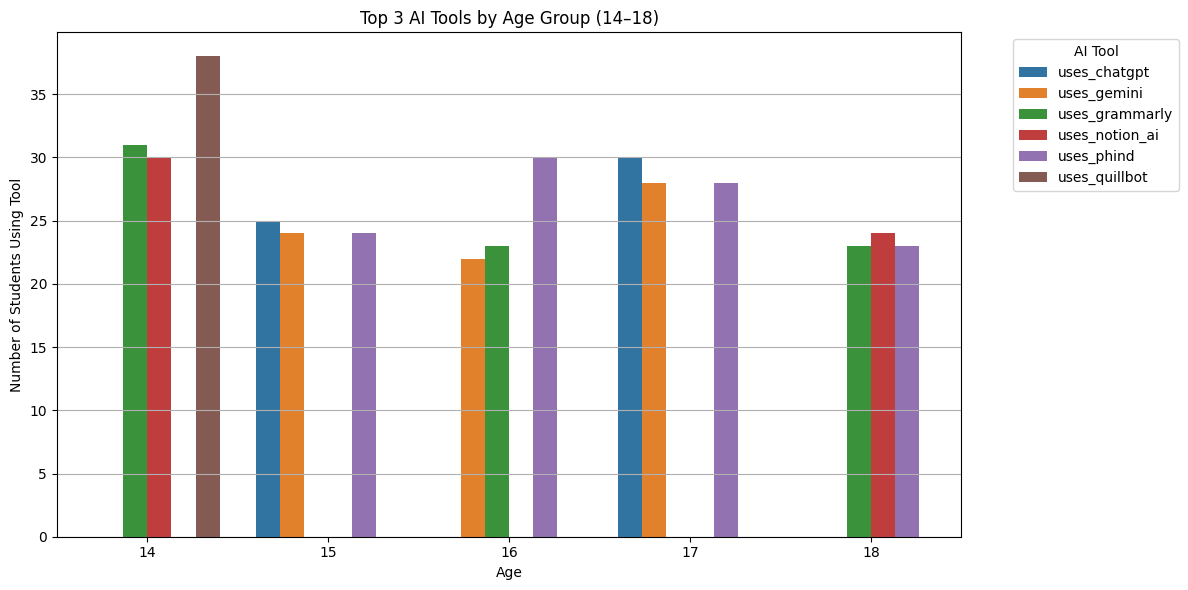

In [63]:

# Get top 3 tools for each age group
top3_by_age = age_tool_usage.apply(lambda x: x.sort_values(ascending=False).head(3), axis=1)

# Reshape for plotting
top3_by_age_reset = top3_by_age.reset_index().melt(id_vars='age', var_name='AI Tool', value_name='Usage Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top3_by_age_reset, x='age', y='Usage Count', hue='AI Tool')
plt.title('Top 3 AI Tools by Age Group (14–18)')
plt.xlabel('Age')
plt.ylabel('Number of Students Using Tool')
plt.legend(title='AI Tool', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Gender

In [20]:
gender_counts = df['gender'].value_counts()


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\3900747996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


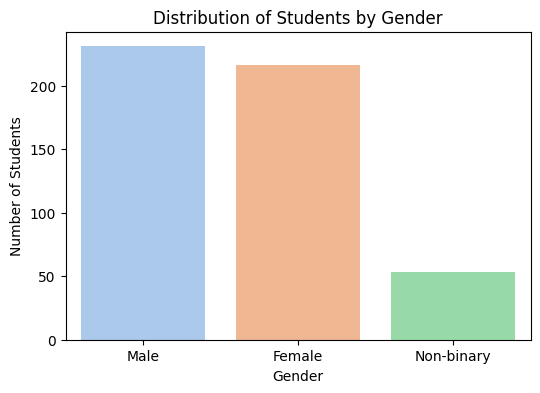

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title("Distribution of Students by Gender")
plt.ylabel("Number of Students")
plt.xlabel("Gender")
plt.show()

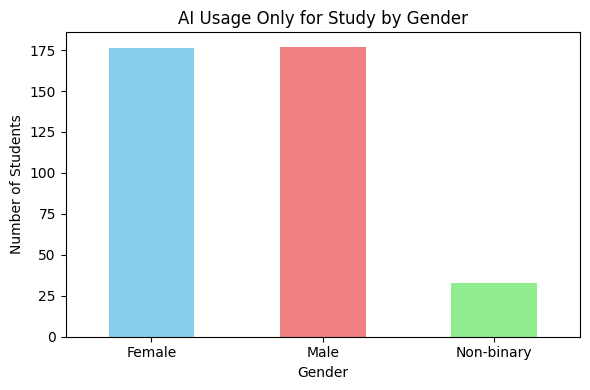

In [59]:
study_only_usage = df.groupby('gender')['uses_ai_for_study'].sum()

# Plotting
plt.figure(figsize=(6, 4))
study_only_usage.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("AI Usage Only for Study by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

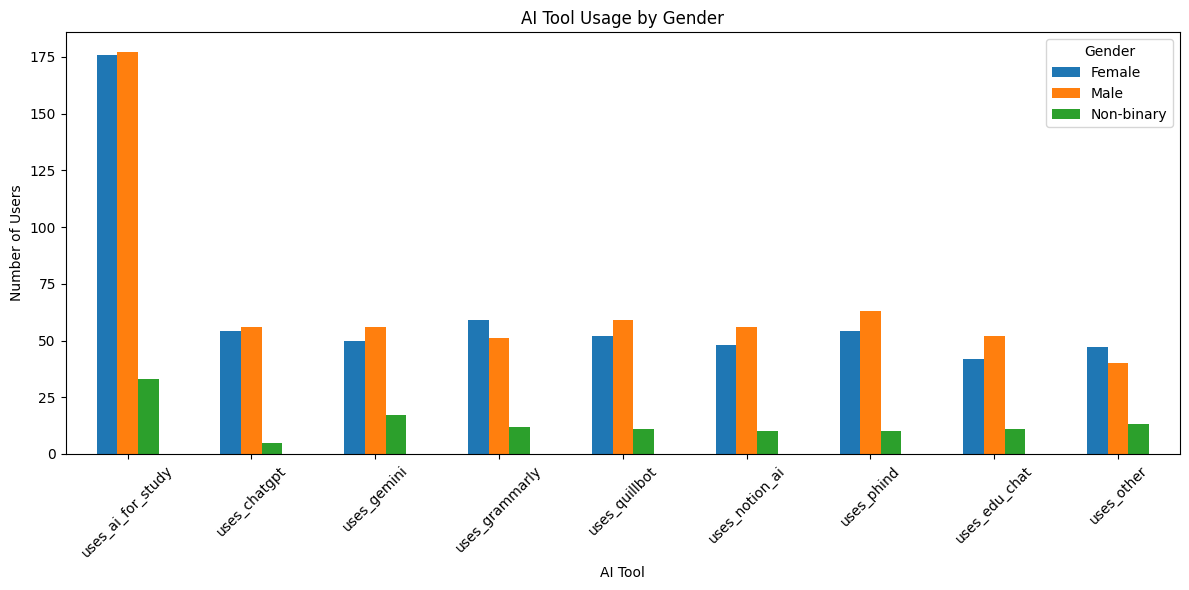

In [22]:
# Select all AI tool usage columns
tool_columns = [col for col in df.columns if col.startswith('uses_')]

# Group by gender and sum the boolean values to get count of users
gender_tool_usage = df.groupby('gender')[tool_columns].sum().T

# Plot
plt.figure(figsize=(12, 6))
gender_tool_usage.plot(kind='bar', figsize=(12, 6))
plt.title("AI Tool Usage by Gender")
plt.ylabel("Number of Users")
plt.xlabel("AI Tool")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


## country

Top 5 Countries Where Students Use AI Tools the Most:

country
UK             44
Nigeria        43
South Korea    42
USA            39
Australia      39
Name: count, dtype: int64


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\2904585752.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_ai_countries.index, y=top_5_ai_countries.values, palette="crest")


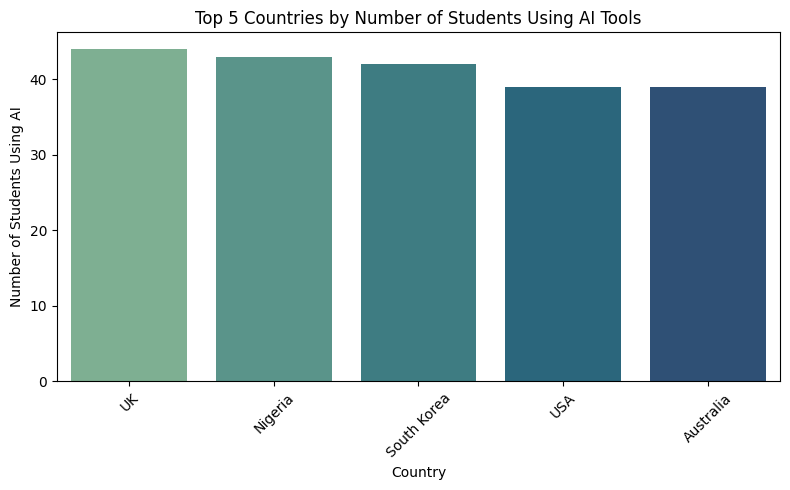

In [27]:
# Step 1: Identify AI tool usage columns
tool_columns = [col for col in df.columns if col.startswith('uses_')]

# Step 2: Create a new column to indicate if a student uses at least one AI tool
df['uses_any_tool'] = df[tool_columns].any(axis=1)

# Step 3: Filter students who use at least one AI tool
df_ai_users = df[df['uses_any_tool'] == True]

# Step 4: Count users by country and get the top 5
top_5_ai_countries = df_ai_users['country'].value_counts().head(5)

# Step 5: Display result
print("Top 5 Countries Where Students Use AI Tools the Most:\n")
print(top_5_ai_countries)

# Optional: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_ai_countries.index, y=top_5_ai_countries.values, palette="crest")
plt.title("Top 5 Countries by Number of Students Using AI Tools")
plt.xlabel("Country")
plt.ylabel("Number of Students Using AI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## grade 

In [29]:
# Check available grade levels
print(df['grade'].unique())


['12th' '10th' '11th' '9th']


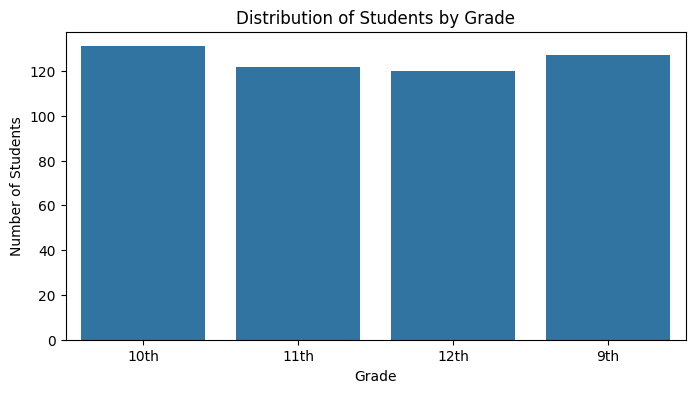

In [31]:


# Grade distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=df, order=sorted(df['grade'].unique()))
plt.title("Distribution of Students by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()


<Figure size 1200x600 with 0 Axes>

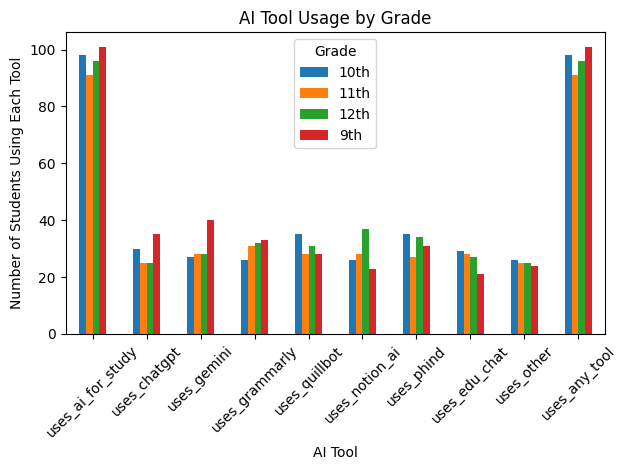

In [32]:
# Tool usage columns
tool_columns = [col for col in df.columns if col.startswith('uses_')]

# Group by grade and count number of users for each tool
grade_tool_usage = df.groupby('grade')[tool_columns].sum()

# Plot
plt.figure(figsize=(12, 6))
grade_tool_usage.T.plot(kind='bar')
plt.title("AI Tool Usage by Grade")
plt.ylabel("Number of Students Using Each Tool")
plt.xlabel("AI Tool")
plt.xticks(rotation=45)
plt.legend(title="Grade")
plt.tight_layout()
plt.show()


In [39]:
# Tools to exclude (adjust names based on actual column names)
tools_to_exclude = ['uses_ai_for_study', 'uses_other','uses_any_tool']

# Remove excluded tools from the list
filtered_tools = [col for col in tool_columns if col not in tools_to_exclude]


In [37]:
# Sum each tool's column to get number of users
tool_usage_counts = df[filtered_tools].sum().sort_values(ascending=False)


In [38]:
top_3_tools = tool_usage_counts.head(3)

print("Top 3 Most Used AI Tools (excluding AI for Study and Other):\n")
print(top_3_tools)


Top 3 Most Used AI Tools (excluding AI for Study and Other):

uses_any_tool    386
uses_phind       127
uses_gemini      123
dtype: int64


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\1979629667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_tools.index.str.replace("uses_", "").str.replace("_", " ").str.title(),


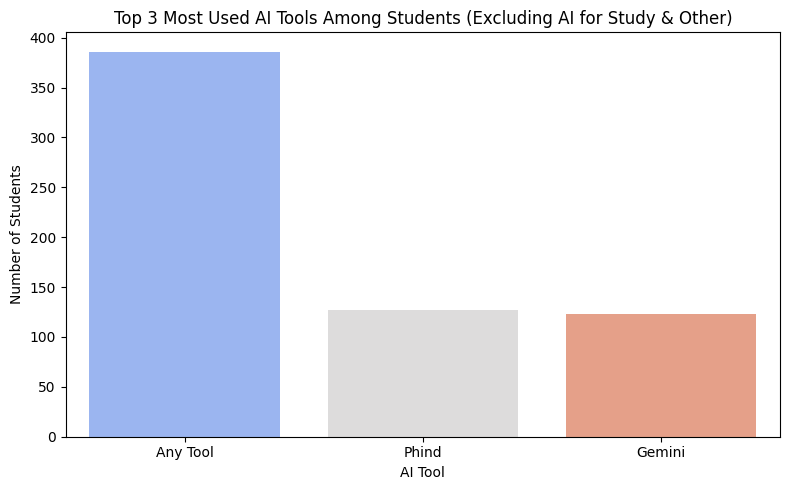

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_tools.index.str.replace("uses_", "").str.replace("_", " ").str.title(),
            y=top_3_tools.values,
            palette="coolwarm")

plt.title("Top 3 Most Used AI Tools Among Students (Excluding AI for Study & Other)")
plt.xlabel("AI Tool")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


## usefullness

In [41]:
# List of usefulness columns
usefulness_columns = [col for col in df.columns if col.startswith('usefulness_')]

# View list to confirm
print(usefulness_columns)


['usefulness_chatgpt', 'usefulness_gemini', 'usefulness_grammarly', 'usefulness_quillbot', 'usefulness_notion_ai', 'usefulness_phind', 'usefulness_edu_chat', 'usefulness_other']


In [42]:
# Calculate mean usefulness for each tool
average_usefulness = df[usefulness_columns].mean().sort_values(ascending=False)

# Rename the index for cleaner tool names
average_usefulness.index = average_usefulness.index.str.replace("usefulness_", "").str.replace("_", " ").str.title()

# Display
print("Average Usefulness Rating for Each Tool:\n")
print(average_usefulness)


Average Usefulness Rating for Each Tool:

Notion Ai    8.201754
Chatgpt      8.139130
Edu Chat     8.114286
Quillbot     8.073770
Grammarly    8.008197
Gemini       7.983740
Other        7.960000
Phind        7.858268
dtype: float64


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\2747232100.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_usefulness.values, y=average_usefulness.index, palette="crest")


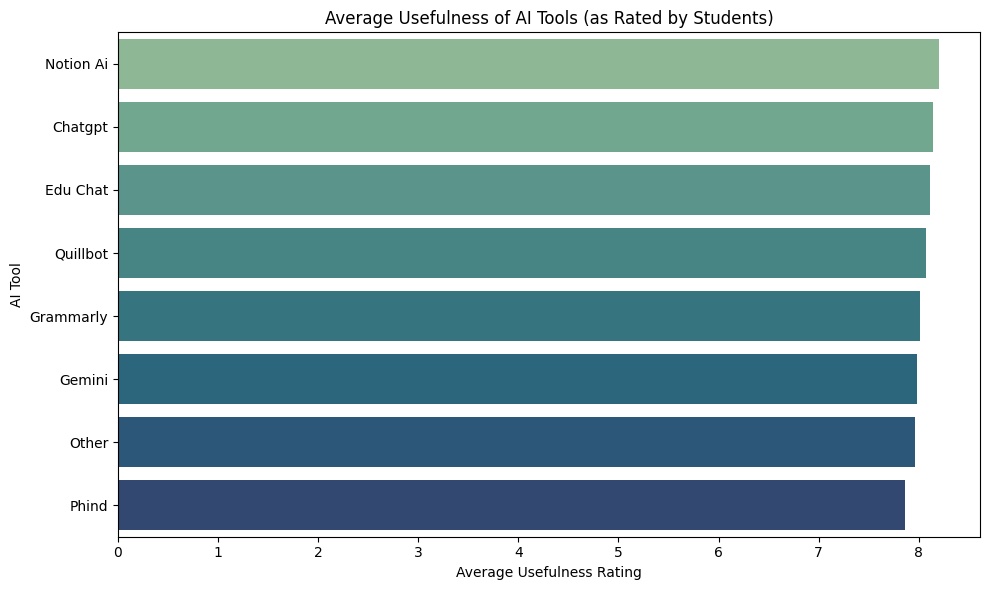

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=average_usefulness.values, y=average_usefulness.index, palette="crest")
plt.xlabel("Average Usefulness Rating")
plt.ylabel("AI Tool")
plt.title("Average Usefulness of AI Tools (as Rated by Students)")
plt.tight_layout()
plt.show()


## AI tools usage break down

In [48]:
# All usage columns
tool_columns = [col for col in df.columns if col.startswith('uses_')]

# Exclude 'uses_ai_for_study'
tool_columns = [col for col in tool_columns if col != 'uses_ai_for_study']


In [49]:
# Count number of users for each tool
tool_usage_counts = df[tool_columns].sum().sort_values(ascending=False)

# Total students
total_students = df.shape[0]

# Create a DataFrame for detailed summary
tool_usage_summary = pd.DataFrame({
    'Tool': tool_usage_counts.index.str.replace("uses_", "").str.replace("_", " ").str.title(),
    'Users': tool_usage_counts.values,
    'Usage %': (tool_usage_counts.values / total_students * 100).round(2)
})

# Show result
print("AI Tool Usage Breakdown:\n")
print(tool_usage_summary)


AI Tool Usage Breakdown:

        Tool  Users  Usage %
0   Any Tool    386     77.2
1      Phind    127     25.4
2     Gemini    123     24.6
3  Grammarly    122     24.4
4   Quillbot    122     24.4
5    Chatgpt    115     23.0
6  Notion Ai    114     22.8
7   Edu Chat    105     21.0
8      Other    100     20.0


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\1580785879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Users', y='Tool', data=tool_usage_summary, palette="viridis")


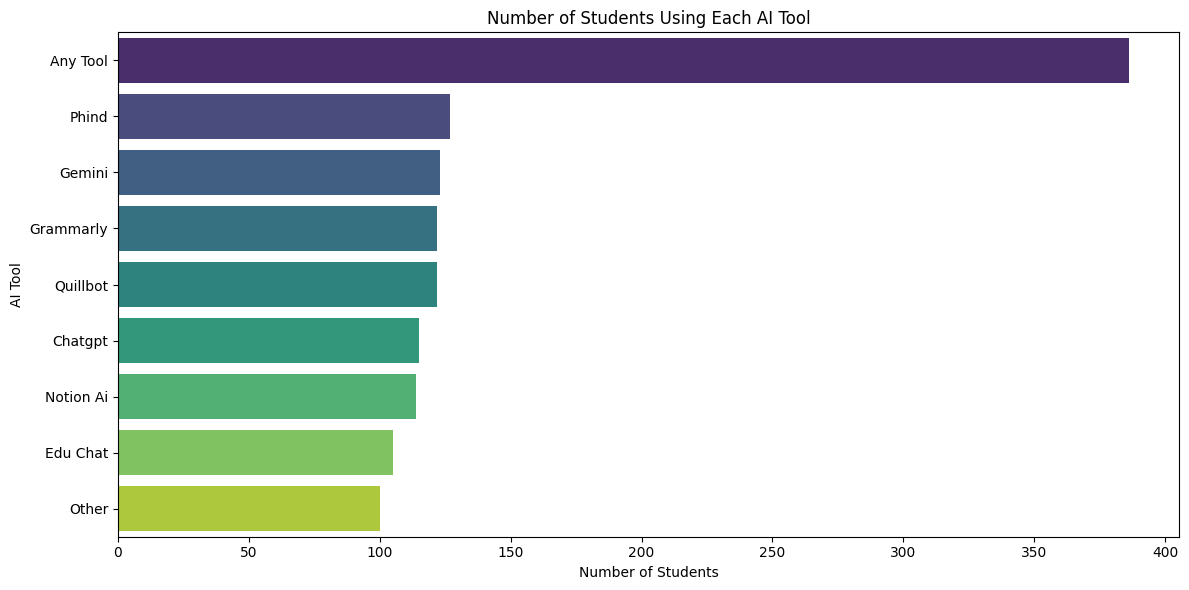

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Users', y='Tool', data=tool_usage_summary, palette="viridis")
plt.title("Number of Students Using Each AI Tool")
plt.xlabel("Number of Students")
plt.ylabel("AI Tool")
plt.tight_layout()
plt.show()


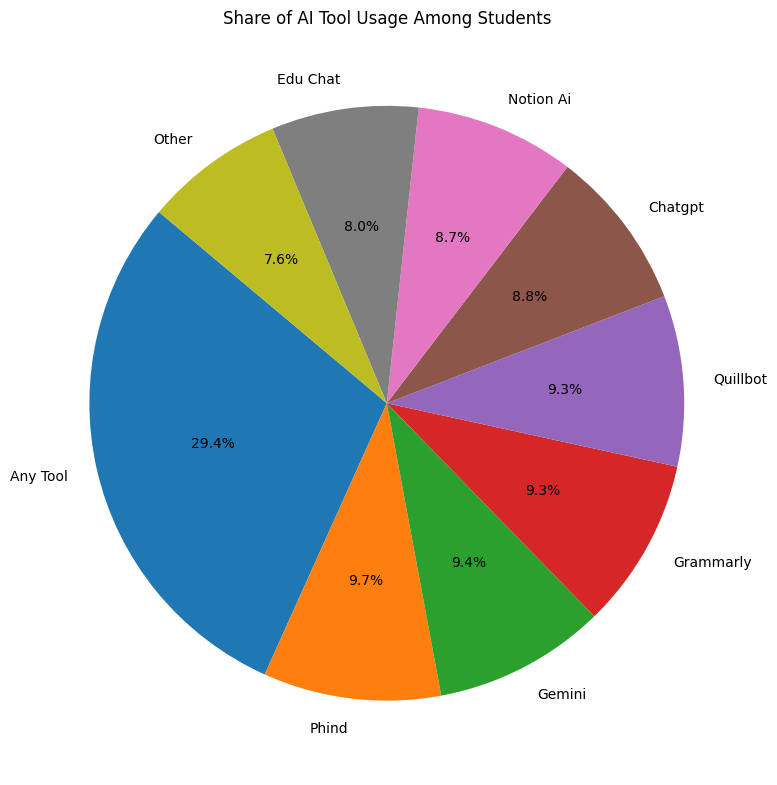

In [51]:
# Pie chart of usage percentage
plt.figure(figsize=(8, 8))
plt.pie(tool_usage_summary['Users'], labels=tool_usage_summary['Tool'], autopct='%1.1f%%', startangle=140)
plt.title("Share of AI Tool Usage Among Students")
plt.tight_layout()
plt.show()


## adoption by country

In [52]:
# All AI usage columns
tool_columns = [col for col in df.columns if col.startswith('uses_')]

# Exclude general-purpose tools
exclude_tools = ['uses_ai_for_study']
tool_columns = [col for col in tool_columns if col not in exclude_tools]


In [53]:
# Create a new column indicating whether the student uses at least one AI tool
df['uses_any_ai'] = df[tool_columns].any(axis=1)


In [54]:

# Group by country
country_adoption = df.groupby('country')['uses_any_ai'].agg(['sum', 'count']).reset_index()

# Calculate percentage
country_adoption['adoption_rate (%)'] = (country_adoption['sum'] / country_adoption['count']) * 100

# Rename columns
country_adoption.columns = ['Country', 'Students Using AI', 'Total Students', 'Adoption Rate (%)']

# Sort by adoption rate
country_adoption = country_adoption.sort_values(by='Adoption Rate (%)', ascending=False)

# Display
print(country_adoption)


       Country  Students Using AI  Total Students  Adoption Rate (%)
4        India                 38              46          82.608696
2       Canada                 33              40          82.500000
0    Australia                 39              48          81.250000
7  South Korea                 42              53          79.245283
3      Germany                 38              48          79.166667
6      Nigeria                 43              56          76.785714
5        Japan                 39              51          76.470588
9          USA                 39              53          73.584906
8           UK                 44              61          72.131148
1       Brazil                 31              44          70.454545


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\3154682595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adoption Rate (%)', y='Country', data=country_adoption, palette="mako")


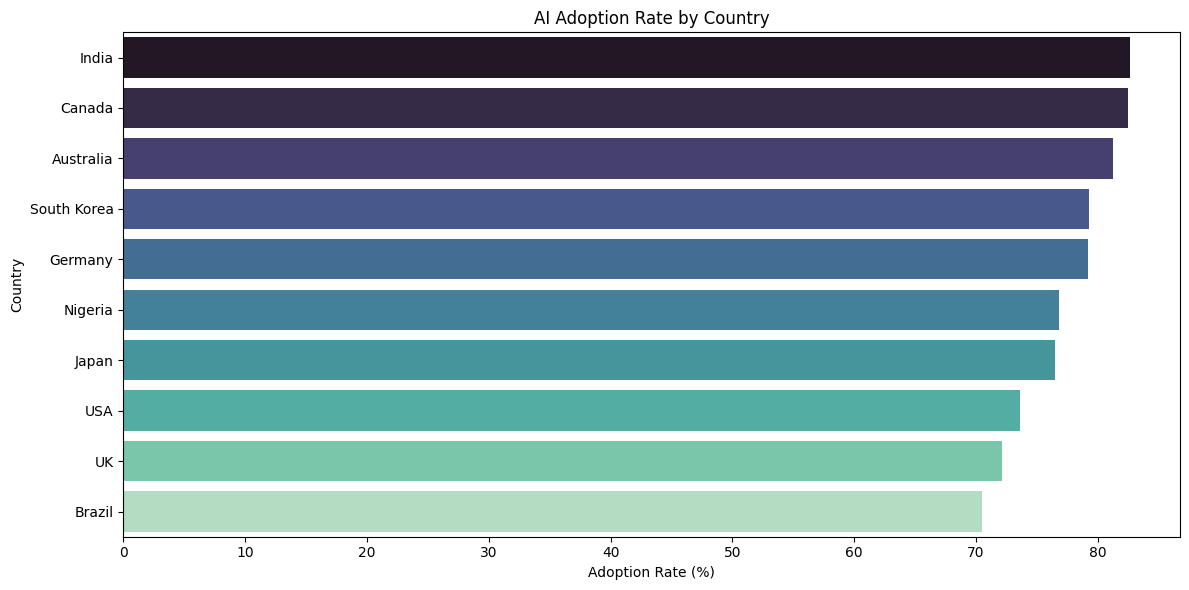

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Adoption Rate (%)', y='Country', data=country_adoption, palette="mako")
plt.title("AI Adoption Rate by Country")
plt.xlabel("Adoption Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [56]:
# Grouping by country and counting AI for Study usage
study_adoption = df.groupby('country')['uses_ai_for_study'].agg(['sum', 'count']).reset_index()

# Calculate percentage
study_adoption['adoption_rate (%)'] = (study_adoption['sum'] / study_adoption['count']) * 100

# Rename columns for clarity
study_adoption.columns = ['Country', 'Students Using AI for Study', 'Total Students', 'Adoption Rate (%)']

# Sort by adoption rate
study_adoption = study_adoption.sort_values(by='Adoption Rate (%)', ascending=False)

# Show result
print(study_adoption)


       Country  Students Using AI for Study  Total Students  Adoption Rate (%)
4        India                           38              46          82.608696
2       Canada                           33              40          82.500000
0    Australia                           39              48          81.250000
7  South Korea                           42              53          79.245283
3      Germany                           38              48          79.166667
6      Nigeria                           43              56          76.785714
5        Japan                           39              51          76.470588
9          USA                           39              53          73.584906
8           UK                           44              61          72.131148
1       Brazil                           31              44          70.454545


C:\Users\ABHI\AppData\Local\Temp\ipykernel_24448\261741150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=study_adoption, x='Adoption Rate (%)', y='Country', palette='coolwarm')


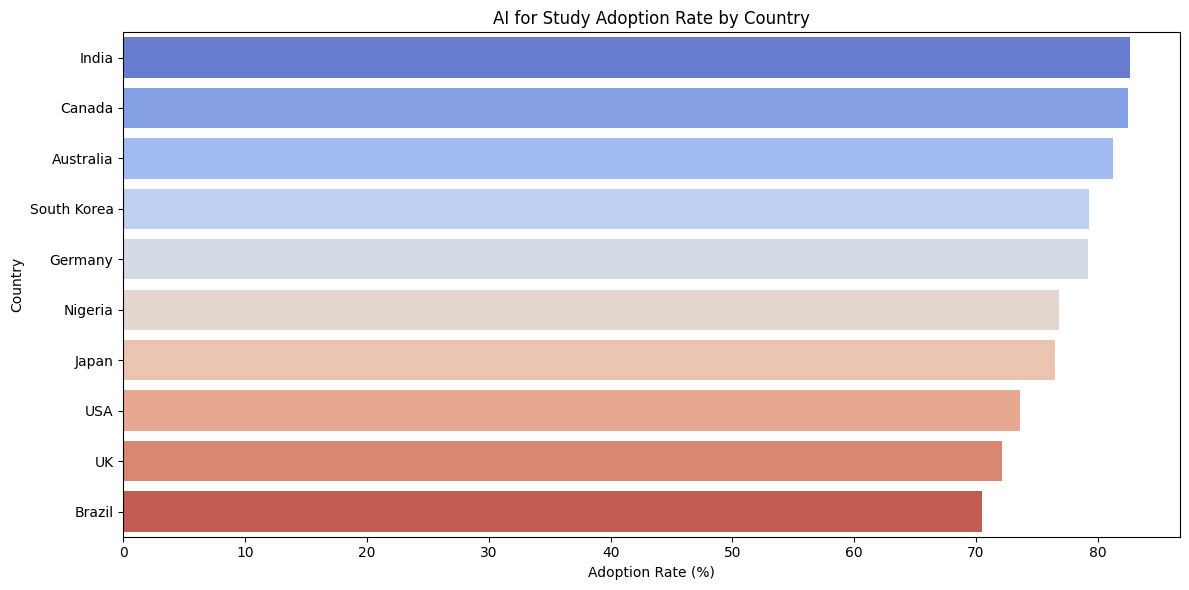

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=study_adoption, x='Adoption Rate (%)', y='Country', palette='coolwarm')
plt.title("AI for Study Adoption Rate by Country")
plt.xlabel("Adoption Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


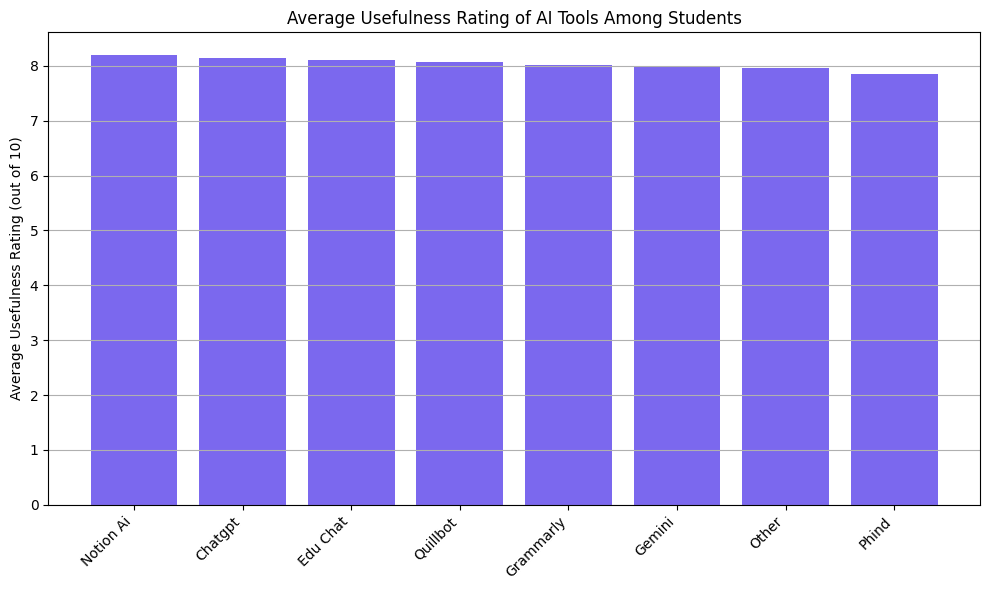

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# List of usefulness columns
usefulness_cols = [
    'usefulness_chatgpt', 'usefulness_gemini', 'usefulness_grammarly',
    'usefulness_quillbot', 'usefulness_notion_ai', 'usefulness_phind',
    'usefulness_edu_chat', 'usefulness_other'
]

# Calculate average usefulness per tool (ignoring NaNs)
avg_usefulness = df[usefulness_cols].mean().sort_values(ascending=False)

# Clean column names for display
tool_labels = [col.replace("usefulness_", "").replace("_", " ").title() for col in avg_usefulness.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(tool_labels, avg_usefulness, color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Usefulness Rating (out of 10)')
plt.title('Average Usefulness Rating of AI Tools Among Students')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


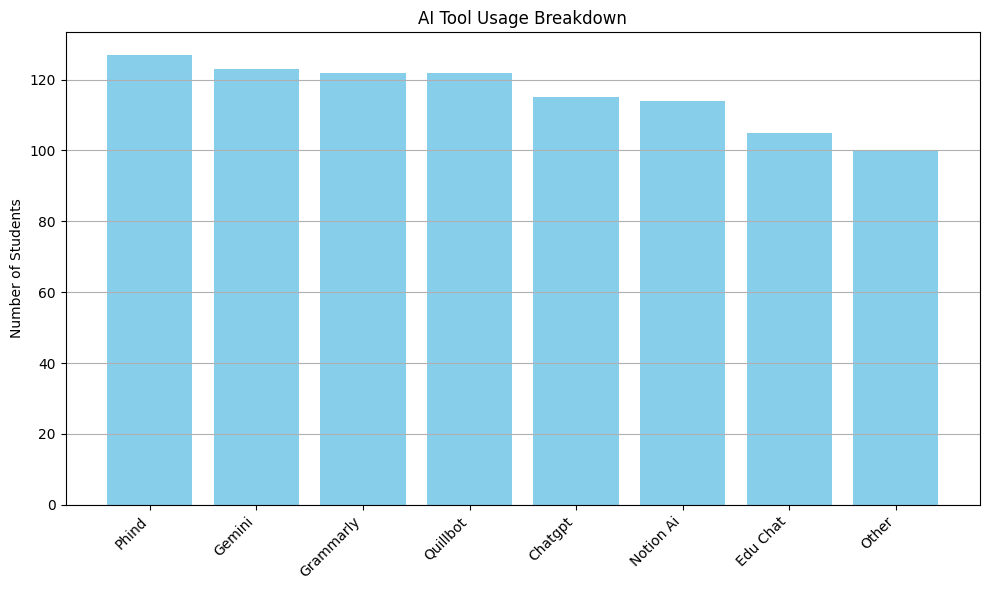

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# List of AI tool usage columns
tool_usage_columns = [
    'uses_chatgpt', 'uses_gemini', 'uses_grammarly',
    'uses_quillbot', 'uses_notion_ai', 'uses_phind',
    'uses_edu_chat', 'uses_other'
]

# Count how many students use each tool
tool_usage_counts = df[tool_usage_columns].sum().sort_values(ascending=False)

# Clean column names for better display
tool_labels = [col.replace('uses_', '').replace('_', ' ').title() for col in tool_usage_counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(tool_labels, tool_usage_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.title('AI Tool Usage Breakdown')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


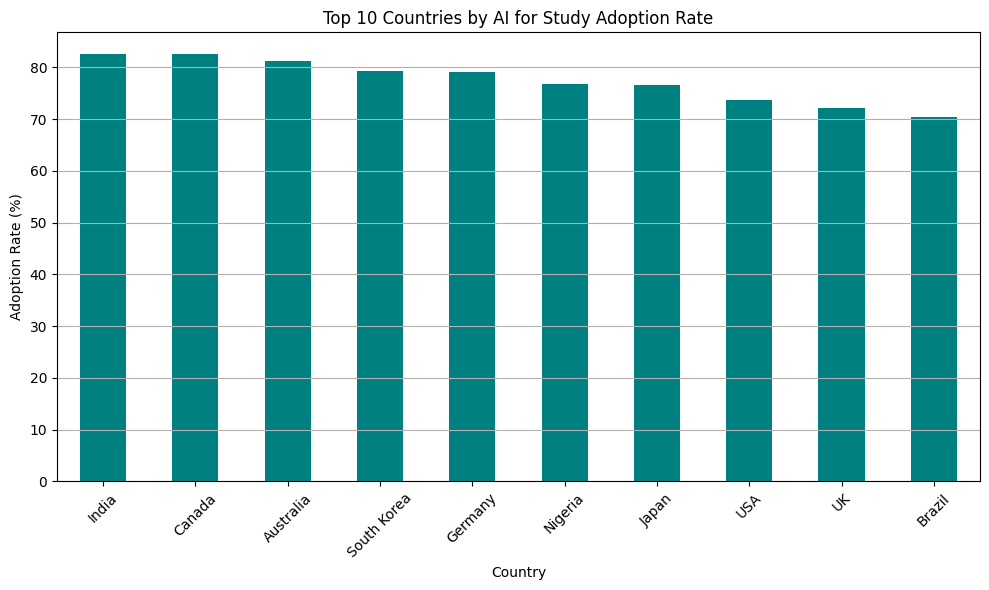

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Count total students per country
total_students = df['country'].value_counts()

# Count students using AI for study per country
ai_study_users = df[df['uses_ai_for_study'] == True]['country'].value_counts()

# Calculate adoption rate per country
adoption_rate = (ai_study_users / total_students) * 100

# Clean NaNs (countries with 0 study users)
adoption_rate = adoption_rate.dropna().sort_values(ascending=False)

# Select top 10 countries
top10_adoption = adoption_rate.head(10)

# Plot
plt.figure(figsize=(10, 6))
top10_adoption.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by AI for Study Adoption Rate')
plt.ylabel('Adoption Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [68]:
import plotly.express as px

# Prepare country adoption dataframe
adoption_df = pd.DataFrame({
    'country': adoption_rate.index,
    'adoption_rate': adoption_rate.values
})

# Plot world map
fig = px.choropleth(adoption_df,
                    locations='country',
                    locationmode='country names',
                    color='adoption_rate',
                    color_continuous_scale='Viridis',
                    title='AI for Study Adoption Rate by Country (%)')

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()
